# Исследование надежности заемщиков

### Описание проекта
<B>Заказчик:</B> кредитный отдел банка.<BR>
<B>Цель исследования:</B> Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. <BR>
<B>Входные данные от банка:</B> Статистика о платёжеспособности клиентов.<BR>
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Обзор данных

### Загрузка и получение общей информации о таблице

In [1]:
# импортируем библиотеку pandas
import pandas as pd

In [2]:
# загрузим данные с локального диска
df = pd.read_csv('/datasets/data.csv')

In [3]:
# получим первые 10 строк таблицы df
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [4]:
# получим общую информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Итак, в таблице 12 столбцов. 

Согласно документации к данным:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

## Шаг 2. Предобработка данных

### Шаг 2.1 Заполнение пропусков

In [5]:
# подсчитаем пропуски
df.isna().sum() 

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Судя по тому, что количество значений в столбцах days_employed и total_income совпадают, причиной пропусков является отсутствие информации в этих полях для не работающих.
Проверим это, если пропущены значения одновременно в обоих столбцах, то скорее всего это так.

In [6]:
# удаляем строки, только если значения отсутствуют в столбце 'days_employed'
test = df.dropna(subset=['days_employed'])
# если исчезнут и пропуски в 'total_income', значит, строки действительно содержат информацию про не работающих
test.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [7]:
# посмотрим, как выглядят пропуски
df.loc[df['total_income'].isna()].sample(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
18553,0,NaN,61,среднее,1,женат / замужем,0,M,пенсионер,0,NaN,получение дополнительного образования
16748,2,NaN,30,неоконченное высшее,2,женат / замужем,0,F,компаньон,0,NaN,дополнительное образование
18698,2,NaN,35,среднее,1,в разводе,3,M,сотрудник,0,NaN,операции с коммерческой недвижимостью
15627,0,NaN,60,среднее,1,женат / замужем,0,F,пенсионер,0,NaN,получение высшего образования
13512,1,NaN,28,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,автомобили
20153,1,NaN,30,высшее,0,женат / замужем,0,F,компаньон,0,NaN,недвижимость
6049,0,NaN,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,NaN,дополнительное образование
1874,1,NaN,51,среднее,1,Не женат / не замужем,4,F,сотрудник,0,NaN,приобретение автомобиля
6097,2,NaN,37,СРЕДНЕЕ,1,гражданский брак,1,F,сотрудник,0,NaN,ремонт жилью
1875,0,NaN,29,высшее,0,женат / замужем,0,M,компаньон,0,NaN,строительство собственной недвижимости


По этой выборке похоже, что клиенты без информации о времени работы и доходе — либо действительно неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка). Без стабильного дохода им, скорее всего, не дали бы кредит, поэтому для сохранения полноты данных есть смысл заполнить значения времени работы и дохода медианными значениями по таблице. Сделаем это после исправления аномалий.

In [8]:
# посчитаем количество клиентов без сведений о размере дохода
df[df['total_income'].isna()].pivot_table(index='income_type', values='debt', aggfunc=['count'])

,count
,debt
income_type,
госслужащий,147
компаньон,508
пенсионер,413
предприниматель,1
сотрудник,1105


In [9]:
# посчитаем общее количество клиентов
df.pivot_table(index='income_type', values='debt', aggfunc=['count'])

,count
,debt
income_type,
безработный,2
в декрете,1
госслужащий,1459
компаньон,5085
пенсионер,3856
предприниматель,2
сотрудник,11119
студент,1


Мы подсчитали количество клиентов по типам занятости. Видно, что в выделенные нами категории "спецклиентов" попадает около 10% клиентов с данными типами занятости. Гипотезе, о том, что это клиенты, о которых банк распологает дополнительной информацией о доходах, не внесенной в исходные данные, результат проверки не противоречит.

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [10]:
# посмотрим на статистические параметры данных
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


Видно, что в столбцах 'children' и 'days_employed' находятся отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. 

In [11]:
# посмотрим число аномальных значений в столбце 'days_employed'
df['days_employed'][df['days_employed'] < 0].count() 

15906

Учитывая большое количество аномалий, отсутствие связи с поставленной задачей и невозможность уточнения информации у заказчика, удалим столбец 'days_employed'.

In [12]:
# удалим столбец 'days_employed'
df = df.drop('days_employed', axis=1)  
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [13]:
# посмотрим число аномальных значений в столбце 'children'
df['children'][df['children'] < 0].count() 

47

Число аномалий невелико. Не имея возможности уточнить у заказчика, примем версию, что минус — ошибка ручного ввода и заменим знак в отрицательных значениях детей. 

In [14]:
# берем все значения количества детей по модулю
df['children'] = df['children'].abs() 

In [15]:
# смотрим статистические параметры столбца 'children' после замены
df['children'].describe() 

count    21525.000000
mean         0.543275
std          1.379876
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [16]:
# посмотрим как распределено число детей
df['children'].value_counts()

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64

20 детей могут быть и усыновленными, а банк часто дает кредиты таким семьям в порядке социальной помощи. Но 76 случаев, это слишком много. Скорее всего это выброс и его стоит заменить медианой.

In [17]:
# заменим выбросы в числе детей медианой
df.loc[df['children'] == 20, 'children'] = df['children'].median()

In [18]:
# подсчитаем количество детей после замены
df['children'].value_counts()

0    14225
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

Теперь в статистических параметрах числа детей не заметны явные аномалии.

In [19]:
# проверим значения столбца'dob_years'
df['dob_years'].value_counts() 

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

В данных есть строки с нулевым возрастом. Очевидно ошибка. Заполним нулевые значения медианой.

In [20]:
# заполняем значения медианой
df.loc[df['dob_years'] == 0, 'dob_years'] = df['dob_years'].median()

In [21]:
# проверим значения столбца'dob_years'
df['dob_years'].value_counts()

42    698
35    617
40    609
41    607
34    603
38    598
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

Аномальные значения возраста устранены.

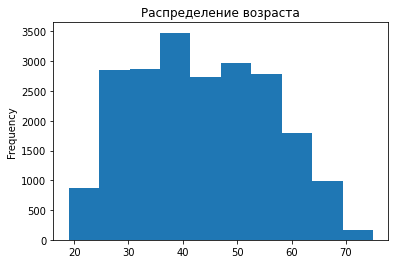

In [22]:
# смотрим график расперделения возрастов
df['dob_years'].plot.hist(title='Распределение возраста'); 

Теперь распределение возрастов близко к нормальному.

In [23]:
# посмотрим статистические параметры дохода
df['total_income'].describe().apply(lambda x: format(x, 'g'))

count         19351
mean         167422
std          102972
min         20667.3
25%          103053
50%          145018
75%          203435
max      2.2656e+06
Name: total_income, dtype: object

Поскольку в значениях дохода аномалий не найдено, можно заменить пропуски медианными значениями по таблице.

In [24]:
# заполняем пропуски столбца 'total_income' медианным значением
df['total_income'] = df['total_income'].fillna(df['total_income'].median()) 

In [25]:
# подсичаем пропуски
df.isna().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Пропуски устранены

### Шаг 2.3. Изменение типов данных.

In [26]:
# получим общую информацию о данных в таблице df
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   dob_years         21525 non-null  int64  
 2   education         21525 non-null  object 
 3   education_id      21525 non-null  int64  
 4   family_status     21525 non-null  object 
 5   family_status_id  21525 non-null  int64  
 6   gender            21525 non-null  object 
 7   income_type       21525 non-null  object 
 8   debt              21525 non-null  int64  
 9   total_income      21525 non-null  float64
 10  purpose           21525 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 1.8+ MB


Столбец 'total_income', содержащий ежемесячный доход, имеет вещественный тип, характер данных позволяет без значительного ущерба изменить его на целочисленный. 

In [27]:
# преобразуем в целочисленный тип
try:
    df['total_income'] = df['total_income'].astype('int') 
except:
    print('Ошибка преобразования типа данных')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   dob_years         21525 non-null  int64 
 2   education         21525 non-null  object
 3   education_id      21525 non-null  int64 
 4   family_status     21525 non-null  object
 5   family_status_id  21525 non-null  int64 
 6   gender            21525 non-null  object
 7   income_type       21525 non-null  object
 8   debt              21525 non-null  int64 
 9   total_income      21525 non-null  int32 
 10  purpose           21525 non-null  object
dtypes: int32(1), int64(5), object(5)
memory usage: 1.7+ MB


Тип данных успешно преобразован

### Шаг 2.4. Удаление дубликатов.

In [28]:
# ищем явные дубликаты
dupes = df.duplicated()  
# смотрим количество явных дубликатов
dupes.sum() 

55

In [29]:
# смотрим образцы дубликатов
df[dupes].sample(10)  

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12373,0,58,среднее,1,женат / замужем,0,M,сотрудник,0,145017,покупка недвижимости
18428,0,64,среднее,1,женат / замужем,0,F,пенсионер,0,145017,жилье
16378,0,46,среднее,1,женат / замужем,0,F,сотрудник,0,145017,высшее образование
9627,0,56,среднее,1,женат / замужем,0,F,пенсионер,0,145017,операции со своей недвижимостью
16904,1,32,высшее,0,женат / замужем,0,F,сотрудник,0,145017,на покупку подержанного автомобиля
20702,0,64,среднее,1,женат / замужем,0,F,пенсионер,0,145017,дополнительное образование
15188,0,60,среднее,1,женат / замужем,0,M,сотрудник,0,145017,покупка недвижимости
19041,0,56,среднее,1,гражданский брак,1,F,сотрудник,0,145017,на проведение свадьбы
18755,0,58,среднее,1,женат / замужем,0,F,пенсионер,0,145017,заняться образованием
18563,0,54,среднее,1,женат / замужем,0,F,сотрудник,0,145017,операции со своей недвижимостью


Отсутствие уникального ID клиента ставит вопрос, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные. Ухудшает ситуацию, что в выборке видно, что доход, который помог бы различить клиентов, заполнен нами медианным значением. Но, поскольку количество дубликатов невелико, и совпадение других данных (возраст, количество детей) снижает вероятность того, что это разные клиенты, удалим повторяющиеся строки.

In [30]:
# удаляем повторяющиеся строки
df = df.drop_duplicates().reset_index(drop=True) 
# смотрим сколько строк в таблице после удаления
len(df) 

21470

Найдем неявные дубликаты

In [31]:
# смотрим все варианты значений в столбце 'education'
df['education'].value_counts() 

среднее                13704
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

Есть совпадающие категории, которые могут быть унифицированы изменением регистра.

In [32]:
# делаем все категории в столбце 'education' small case
df['education']=df['education'].str.lower() 
# смотрим все варианты значений в столбце 'education'
df['education'].value_counts()

среднее                15187
высшее                  5251
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

Неявные дубликаты в столбце 'education' устранены

In [33]:
# смотрим все варианты значений в столбце 'family_status'
df['family_status'].value_counts() 

женат / замужем          12344
гражданский брак          4162
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

Дубликатов нет

In [34]:
# смотрим все варианты значений в столбце 'income_type'
df['income_type'].value_counts() 

сотрудник          11090
компаньон           5080
пенсионер           3837
госслужащий         1457
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64

Дубликатов нет

In [35]:
# смотрим все варианты значений в столбце 'purpose'
df['purpose'].value_counts() 

свадьба                                   793
на проведение свадьбы                     772
сыграть свадьбу                           769
операции с недвижимостью                  675
покупка коммерческой недвижимости         662
покупка жилья для сдачи                   652
операции с жильем                         652
операции с коммерческой недвижимостью     650
покупка жилья                             646
жилье                                     646
покупка жилья для семьи                   638
строительство собственной недвижимости    635
недвижимость                              633
операции со своей недвижимостью           627
строительство жилой недвижимости          625
покупка недвижимости                      621
покупка своего жилья                      620
строительство недвижимости                619
ремонт жилью                              607
покупка жилой недвижимости                606
на покупку своего автомобиля              505
заняться высшим образованием      

Похоже, что есть дубликаты, например варианты со свадьбой. Лучше уточнить у заказчика, но, в отсутствии такой возможности, попробуем устранить самые очевидные дубликаты.

In [36]:
# создадим функцию для замены неявных дубликатов
def replace_dupes(dupes, replacement): 
    for dupe in dupes:
        df['purpose'] = df['purpose'].replace(dupe, replacement)

In [37]:
# заменим синонимы
replace_dupes(['свадьба', 'сыграть свадьбу'],'на проведение свадьбы') 
replace_dupes(['заняться образованием', 'образование'],'получение образования')
replace_dupes(['заняться высшим образованием', 'высшее образование'],'получение высшего образования')
replace_dupes(['автомобиль', 'автомобили', 'свой автомобиль', 'приобретение автомобиля', 'на покупку своего автомобиля'],'на покупку автомобиля')
replace_dupes(['покупка своего жилья', 'покупка жилья для семьи', 'жилье'],'покупка жилья')

In [38]:
# смотрим все варианты значений в столбце 'purpose'
df['purpose'].value_counts() 

на покупку автомобиля                     2889
покупка жилья                             2550
на проведение свадьбы                     2334
получение высшего образования             1374
получение образования                     1297
операции с недвижимостью                   675
покупка коммерческой недвижимости          662
покупка жилья для сдачи                    652
операции с жильем                          652
операции с коммерческой недвижимостью      650
строительство собственной недвижимости     635
недвижимость                               633
операции со своей недвижимостью            627
строительство жилой недвижимости           625
покупка недвижимости                       621
строительство недвижимости                 619
ремонт жилью                               607
покупка жилой недвижимости                 606
сделка с подержанным автомобилем           486
на покупку подержанного автомобиля         478
дополнительное образование                 460
сделка с авто

Число категорий сокращено. Дальнейшее сокращение, может привести к утрате важной информации.

В результате явные дубликаты найдены и удалены методами <CODE>.duplicated() .drop_duplicates()</CODE>, как самым простым способом.<BR>
Неявные дубликаты искались визуально, по спискам <CODE>.value_counts()</CODE>, так как такого качества обработки достаточно для решения задачи.<BR>
Появление явных дубликатов возможно вызвано технической ошибкой.<BR>
Появление неявных дубликтов возможно вызвано человеческим фактором. Скорее всего данные вводились вручную и получались из разных источников.

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создадим два новых датафрейма, в которых:
* каждому уникальному значению из education соответствует уникальное значение education_id — в первом;
* каждому уникальному значению из family_status соответствует уникальное значение family_status_id — во втором.

In [39]:
# скопируем столбцы 'education','education_id' и удалим дубликаты для создания словаря education_dict
education_dict = df[['education','education_id']] 
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
education_dict

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [40]:
# скопируем столбцы 'family_status', 'family_status_id' и удалим дубликаты для создания словаря family_dict
family_dict = df[['family_status', 'family_status_id']] 
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
family_dict

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [41]:
# удалим столбцы education и family_status, оставив только их идентификаторы
df = df.drop(['education', 'family_status'], axis=1) 
df.head(5)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,36,1,0,F,сотрудник,0,112080,на покупку автомобиля
2,0,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,53,1,1,F,пенсионер,0,158616,на проведение свадьбы


### Шаг 2.6. Категоризация дохода.

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [42]:
# создадим функцию, возвращающую категорию дохода, используя правила приведенные выше
def income_category(income): 

    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A' 

In [43]:
# создадим столбец с категориями по доходу
df['total_income_category'] = df['total_income'].apply(income_category) 
df.sample(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
14077,0,42,1,0,F,сотрудник,0,55558,получение дополнительного образования,C
14653,0,39,1,0,M,сотрудник,0,176567,сделка с подержанным автомобилем,C
18752,0,56,1,1,F,сотрудник,0,234852,на проведение свадьбы,B
18507,0,50,1,1,F,пенсионер,0,135514,покупка жилья,C
1067,0,28,1,1,F,сотрудник,0,124661,на проведение свадьбы,C
11036,0,51,1,2,F,пенсионер,0,42091,покупка коммерческой недвижимости,D
19856,0,61,1,0,F,пенсионер,0,113380,сделка с подержанным автомобилем,C
12801,0,63,1,0,F,пенсионер,0,100581,покупка жилой недвижимости,C
20508,2,30,1,1,M,компаньон,0,145017,на проведение свадьбы,C
11759,0,42,1,3,F,компаньон,0,116811,операции с коммерческой недвижимостью,C


### Шаг 2.7. Категоризация целей кредита.

На основании данных из столбца purpose сформируем новый столбец purpose_category, в который войдут следующие категории:
* 'операции с автомобилем',
*  'операции с недвижимостью',
*  'проведение свадьбы',
*  'получение образования'.

In [44]:
# смотрим возможные значения целей
df['purpose'].value_counts() 

на покупку автомобиля                     2889
покупка жилья                             2550
на проведение свадьбы                     2334
получение высшего образования             1374
получение образования                     1297
операции с недвижимостью                   675
покупка коммерческой недвижимости          662
покупка жилья для сдачи                    652
операции с жильем                          652
операции с коммерческой недвижимостью      650
строительство собственной недвижимости     635
недвижимость                               633
операции со своей недвижимостью            627
строительство жилой недвижимости           625
покупка недвижимости                       621
строительство недвижимости                 619
ремонт жилью                               607
покупка жилой недвижимости                 606
сделка с подержанным автомобилем           486
на покупку подержанного автомобиля         478
дополнительное образование                 460
сделка с авто

In [45]:
# создадим функцию, возвращающую категорию цели, используя правила приведенные выше
def purpose_category(purpose): 

    if 'автом' in purpose:
        return 'операции с автомобилем'
    if ('жил' in purpose) or ('недви' in purpose):
        return 'операции с недвижимостью'
    if 'свад' in purpose:
        return 'проведение свадьбы'
    if 'образ' in purpose:
        return 'получение образования'

In [46]:
# создадим столбец с категориями по доходу
df['purpose_category'] = df['purpose'].apply(purpose_category)
df.sample(10)

,children,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
19513,1,45,1,4,F,компаньон,0,303383,операции с недвижимостью,B,операции с недвижимостью
16950,0,39,1,0,M,сотрудник,0,359380,покупка жилья,B,операции с недвижимостью
515,1,51,1,0,F,компаньон,0,145017,на покупку автомобиля,C,операции с автомобилем
14230,0,61,1,0,F,пенсионер,0,159897,профильное образование,C,получение образования
13073,0,51,1,4,F,компаньон,0,145017,на покупку автомобиля,C,операции с автомобилем
1164,0,57,1,1,F,госслужащий,0,153017,ремонт жилью,C,операции с недвижимостью
17637,0,38,1,0,M,сотрудник,0,199519,операции со своей недвижимостью,C,операции с недвижимостью
2335,0,65,1,1,F,пенсионер,0,121084,покупка жилья,C,операции с недвижимостью
12471,0,28,1,0,M,компаньон,0,145017,операции с недвижимостью,C,операции с недвижимостью
12871,0,50,0,0,F,сотрудник,0,105978,на покупку автомобиля,C,операции с автомобилем


### Шаг 2.8 Выводы по предобработке данных

1. В столбцах `days_employed` и `total_income` есть пропуски, которые совпадают по столбцам. Похоже, что клиенты без информации о времени работы и доходе — либо неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка). Поскольку без стабильного дохода им, скорее всего, не дали бы кредит, для сохранения полноты данных пропущенные значения заполнены медианными значениями по таблице.
2. В столбцах `children` и `days_employed` найдены отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. 
    - Учитывая большое количество аномалий, отсутствие связи с поставленной задачей и невозможность уточнения информации у заказчика столбец `days_employed` удален.
    - Число аномалий в столбцах 'children' невелико. Не имея возможности уточнить у заказчика, мы предположили, что минус — ошибка ручного ввода и заменили знак в отрицательных значениях детей. Также в этом столбце найдено несколько значений `20`. Это похоже на ошибку. Учитывая небольшое количество таких значений, они были заменены медианой.
3. В столбце `dob_years` есть строки с нулевым возрастом. Очевидно это ошибка. Нулевые значения заполнены медианой.
4. Столбец `total_income`, содержащий ежемесячный доход, имеет вещественный тип, характер данных позволяет без значительного ущерба изменить его на целочисленный, что и было сделано.
5. Отсутствие уникального ID клиента вызвало проблемы с поиском явных дубликатов. Не ясно, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные. Ухудшает ситуацию, что в выборке видно, что доход, который помог бы различить клиентов, заполнен нами медианным значением. Но, поскольку количество дубликатов невелико, и совпадение других данных (возраст, количество детей) снижает вероятность того, что это разные клиенты, повторяющиеся строки были удалены.
6. В столбце `education` есть совпадающие категории, которые нами унифицированы изменением регистра.
7. Созданы два новых датафрейма, в которых каждому уникальному значению из `education` соответствует уникальное значение `education_id` — в первом; и каждому уникальному значению из `family_status` соответствует уникальное значение `family_status_id` — во втором.
8.  С целью категоризация дохода и целей кредита созданы столбцы `total_income_category` и `purpose_category` с соответствующими категориями.

### Ответы на вопросы.

#### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

Посчитаем процент должников по числу детей.

In [47]:
# построим таблицу с количеством должников и общим количеством детей по числу детей в семье
debt_per_cat1 = df.pivot_table(index=['children'],  values='debt', aggfunc=['sum', 'count']) 
# переименовываем столбцы
debt_per_cat1 = debt_per_cat1.set_axis(['debtors', 'count'], axis=1, inplace=False) 
# считаем соотношение должников и общего числа клиентов с данным количеством детей
debt_per_cat1['debt_ratio'] = debt_per_cat1['debtors'] / debt_per_cat1['count']
debt_per_cat1

,debtors,count,debt_ratio
children,,,
0,1071,14182,0.075518
1,445,4856,0.091639
2,194,2052,0.094542
3,27,330,0.081818
4,4,41,0.097561
5,0,9,0.000000


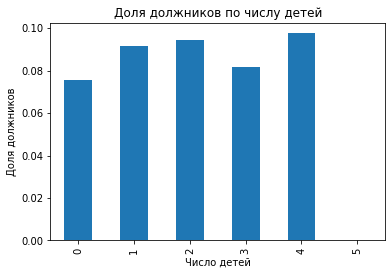

In [48]:
# строим график
debt_per_cat1['debt_ratio'].plot.bar(title = 'Доля должников по числу детей', xlabel='Число детей', ylabel='Доля должников');

Наблюдается незначительное повышение частоты невозврата кредита в срок при увеличении числа детей. Возможно это связано с тем, что дети – значительный источник расходов, и увеличение их числа повышает финансовую нагрузку.

#### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

Посчитаем процент должников в зависимости от семейнонго положения.

In [49]:
# строим таблицу с количеством должников и семейным положением
debt_per_cat2 = df.pivot_table(index=['family_status_id'],  values='debt', aggfunc=['sum', 'count']) 
# переименовываем столбцы
debt_per_cat2 = debt_per_cat2.set_axis(['debtors', 'count'], axis=1, inplace=False) 
# считаем соотношение должников и общего числа клиентов с данным  семейным положением
debt_per_cat2['debt_ratio'] = debt_per_cat2['debtors'] / debt_per_cat2['count'] 
debt_per_cat2

,debtors,count,debt_ratio
family_status_id,,,
0,931,12344,0.075421
1,388,4162,0.093224
2,63,959,0.065693
3,85,1195,0.071130
4,274,2810,0.097509


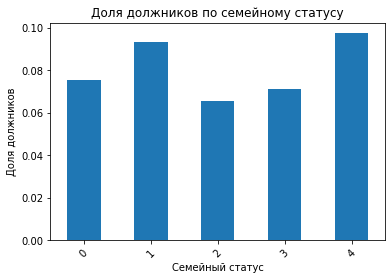

In [50]:
# строим график
debt_per_cat2['debt_ratio'].plot.bar(title = 'Доля должников по семейному статусу', xlabel='Семейный статус', ylabel='Доля должников', rot=45); 

Наблюдается заметное повышение частоты невозврата кредита в категориях "гражданский брак" и "не женат/не замужем". Возможно это связано с тем, что в семье вырабатывается более строгая финансовая дисциплина, привычка к которой сохраняется даже во вдовстве и разводе.

#### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посчитаем процент должников в зависимости от уровня дохода.

In [51]:
debt_per_cat3 = df.pivot_table(index=['total_income_category'],  values='debt', aggfunc=['sum', 'count']) # таблица с количеством 
                                                                               # должников и уровнем дохода
debt_per_cat3 = debt_per_cat3.set_axis(['debtors', 'count'], axis=1, inplace=False) # переименовываем столбцы
debt_per_cat3['debt_ratio'] = debt_per_cat3['debtors'] / debt_per_cat3['count'] # считаем соотношение должников и общего числа
                                                                               # клиентов с данным  уровнем дохода 
debt_per_cat3['income_cat'] = ['0–30000', '30001–50000', '50001–200000', '200001–1000000',  'выше 1000001'] # обогащаем таблицу 
                                                                               # текстовыми значениями уровня дохода 
debt_per_cat3

,debtors,count,debt_ratio,income_cat
total_income_category,,,,
A,2,25,0.080000,0–30000
B,356,5041,0.070621,30001–50000
C,1360,16032,0.084830,50001–200000
D,21,350,0.060000,200001–1000000
E,2,22,0.090909,выше 1000001


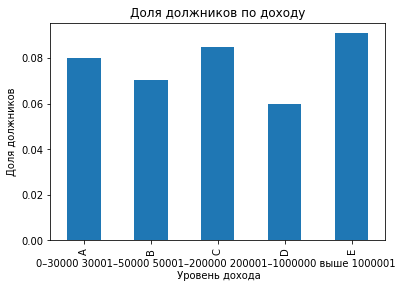

In [52]:
# строим график
debt_per_cat3['debt_ratio'].plot.bar(title = 'Доля должников по доходу', xlabel = (debt_per_cat3['income_cat']+' ').sum()+'\n Уровень дохода', ylabel='Доля должников');

Четкая зависимость между уровнем дохода и возвратом кредита в срок не наблюдается. Большее число невозвратов в группе с высокими доходами, скорее всего объясняется тем, что члены этой группы привыкли к соответственно высоким расходам, что ухудшает финансовую дисциплину.

#### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Посчитаем процент должников в зависимости от цели кредита.

In [53]:
# строим таблицу с количеством должников и уровнем дохода
debt_per_cat4 = df.pivot_table(index=['purpose_category'],  values='debt', aggfunc=['sum', 'count']) 
# переименовываем столбцы
debt_per_cat4 = debt_per_cat4.set_axis(['debtors', 'count'], axis=1, inplace=False) 
# считаем соотношение должников и общего числа клиентов с данным  уровнем дохода
debt_per_cat4['debt_ratio'] = debt_per_cat4['debtors'] / debt_per_cat4['count']  
debt_per_cat4

,debtors,count,debt_ratio
purpose_category,,,
операции с автомобилем,403,4308,0.093547
операции с недвижимостью,782,10814,0.072314
получение образования,370,4014,0.092177
проведение свадьбы,186,2334,0.079692


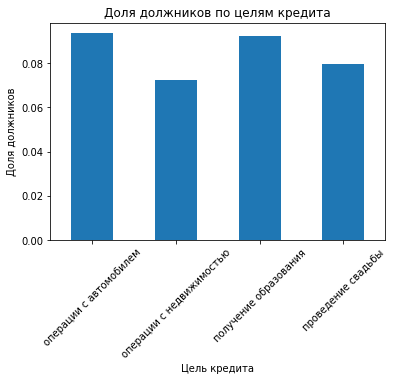

In [54]:
# строим график
debt_per_cat4['debt_ratio'].plot.bar(title = 'Доля должников по целям кредита', xlabel='Цель кредита', ylabel='Доля должников', rot=45);

Самые рискованные кредиты — на операции с автомобилем и получение образования. Низкая надежность заемщиков по автокредитам возможно объясняется тем, что в современном обществе автомобиль рассматривается как вешь первой необходимости, и для его получения многие готовы брать кредит, не оценивая возможность погашения. Кредиты на образование берут как правило молодые люди, с нестабильными и низкими доходами и низкой финансовой дисциплиной, что влияет на высокую долю невозвратов в срок. Покупка недвижимости - очень крупная операция, совершая которую заемщики заранее оценивают свою способность погасить кредит, а длительный срок погашения таких кредитов вырабатывает финансовую дисциплину, поэтому нарушения по этой группе кредитов менее частые.

Проверим предположение, что на образование кредиты берут более молодые люди.

In [55]:
# посчитаем статистические характеристики возраста заемщиков на образование
df['dob_years'][df['purpose_category'] == 'получение образования'].describe() 

count    4014.000000
mean       43.595914
std        12.322101
min        19.000000
25%        34.000000
50%        42.000000
75%        54.000000
max        75.000000
Name: dob_years, dtype: float64

In [56]:
# посчитаем статистические характеристики возраста заемщиков на автомобиль
df['dob_years'][df['purpose_category'] == 'операции с автомобилем'].describe()

count    4308.000000
mean       43.691736
std        12.199836
min        19.000000
25%        34.000000
50%        43.000000
75%        54.000000
max        74.000000
Name: dob_years, dtype: float64

Предположение не подтвердилось, характеристики возраста для заемщиков по обоим видам кредитов очень похожи. Возможно причина высокой доли невозвратов по образовательным кредитам в том, что сумма кредита на образование меньше, и к ее возврату относятся менее ответственно.

### Выводы

#### Вывод 1: 
Есть слабая зависимость частоты невозврата кредита в срок при увеличении числа детей. 

#### Вывод 2:
Частота невозврата кредита в срок выше для холостых и находящихся в гражданском браке. 

#### Вывод 3: 
Зависимость невозврата кредита в срок от уровня дохода не установлена.

#### Вывод 4: 
По кредитам на операции с автомобилем и получение образования выше частота невозвратов в срок. 

## Общий вывод:

Во время предобработки данных выявлены следующие проблемы с исходными данными:
1. В столбцах `days_employed` и `total_income` есть пропуски, которые совпадают по столбцам. Похоже, что клиенты без информации о времени работы и доходе — либо неработающие (пенсионер), либо сотрудники (или компаний клиентов, или самого банка).
2. В столбцах `children` и `days_employed` найдены отрицательные значения, не имеющие физического смысла. Возможно, это вызвано опечаткой при внесении данных вручную. Также в  столбце `children`  найдено несколько значений `20`. Это похоже на ошибку.
3. В столбце `dob_years` есть строки с нулевым возрастом. Очевидно это ошибка.
4. Отсутствие уникального ID клиента вызвало проблемы с поиском явных дубликатов. Не ясно, вызвано ли дублирование ошибкой, или у разных клиентов действительно совпадают приведенные в параметрах данные.
5. В столбце `education` есть совпадающие категории, которые могут быть унифицированы изменением регистра.

Нами проанализированы предоставленные заказчиком данные о платёжеспособности клиентов.<BR><BR>
В ходе исследования были даны ответы на следующие вопросы:
* Есть ли зависимость между количеством детей и возвратом кредита в срок?
* Есть ли зависимость между семейным положением и возвратом кредита в срок?
* Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
* Как разные цели кредита влияют на его возврат в срок?<BR><BR>
Были установленны следующие зависимости характеристик клиентов и кредита на факт погашения кредита в срок:<BR>
* Частота невозврата кредита в срок при увеличении числа детей повышается.
* Частота невозврата кредита в срок выше для холостых и находящихся в гражданском браке.
* Частота невозврата кредита в срок выше по кредитам на операции с автомобилем и получение образования.<BR><BR>
Зависимость невозврата кредита в срок от уровня дохода не установлена.<BR><BR>
Рекомендации:<BR>
При построении модели кредитного скоринга использовать вышеуказанные зависимости.